In [1]:
import pandas as pd

data = pd.read_csv('forestfires.csv')
data.shape

(517, 13)

1. количество объектов: 517; признаков: 13

X - координата в пространстве по оси Х в границах карты парка Монтесиньо: от 1 до 9
Y - координата в пространстве по оси Y в границах карты парка Монтесиньо: от 2 до 9
month - месяц года: от 'jan' до 'dec'
day - день недели: от 'mon' до 'sun'
FFMC - The Fine Fuel Moisture Code - индекс влажности измельченного топлива (индекс системы пожаров и погоды): от 18.7 до 96.20
DMC - The Duff Moisture Code - индекс влажности штыба (мелкий уголь) (индекс системы пожаров и погоды): от 1.1 до 291.3
DC - The Drought Code - индекс засушливости (индекс системы пожаров и погоды): от 7.9 до 860.6
ISI - The Initial Spread Index - индекс мгновенного распространения (индекс системы пожаров и погоды): от 0.0 до 56.10
temp - температура в градусах Цельсия: от 2.2 до 33.30
RH - относительная влажность в %: от 15.0 до 100
wind - скорость ветра в км/ч: от 0.40 до 9.40
rain - дождевые осадки в мм/м2 : от 0.0 до 6.4
area - выжженые территори в га: от 0.00 до 1090.84

In [2]:
# по данным первым и последним пяти строкам нельзя сказать, что есть объекты с NA
data.head()
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [3]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
label.fit(data.day)
data.day = label.transform(data.day)

label2 = LabelEncoder()
label2.fit(data.month)
data.month = label2.transform(data.month)

In [4]:
data['month'].value_counts()

1     184
11    172
7      54
5      32
3      20
6      17
10     15
0       9
2       9
4       2
8       2
9       1
Name: month, dtype: int64

In [5]:
data['day'].value_counts()

3    95
0    85
2    84
1    74
5    64
4    61
6    54
Name: day, dtype: int64

2. Всего 2 категориальных признака: day, month, для дальнейшей работы закодируем эти признаки
3. month - столбец с максимальным значением уникальных признаков (всего уникальных признаков - 12), у столбца day - 7 значений

In [6]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,9,5,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int32  
 3   day     517 non-null    int32  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int32(2), int64(3)
memory usage: 48.6 KB


4. Бинарных признаков нет
5. Числовые признаки: X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area
6. Пропусков нет
7. В данном датасете нет объектов с пропусками
8. Столбца с максимальным количеством пропусков нет

In [9]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [10]:
data.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.017303,-0.009129,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.062162,0.030100,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.017303,-0.062162,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054
day,-0.009129,0.030100,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916
FFMC,-0.021039,-0.046308,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


In [11]:
from sklearn.preprocessing import StandardScaler

scale_features_std = StandardScaler()
features_std = scale_features_std.fit_transform(data[['DMC', 'FFMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']])
features_std

array([[-1.32332557, -0.80595947, -1.83047676, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [-1.17954077, -0.00810203,  0.48889092, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [-1.04982188, -0.00810203,  0.56071545, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [-0.84664771, -1.64008316,  0.47476811, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [ 0.54900254,  0.68095666,  0.26938221, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [-1.68591332, -2.02087875, -1.78044169, ...,  0.26950853,
        -0.07326831, -0.20201979]])

Text(0, 0.5, 'FFMC')

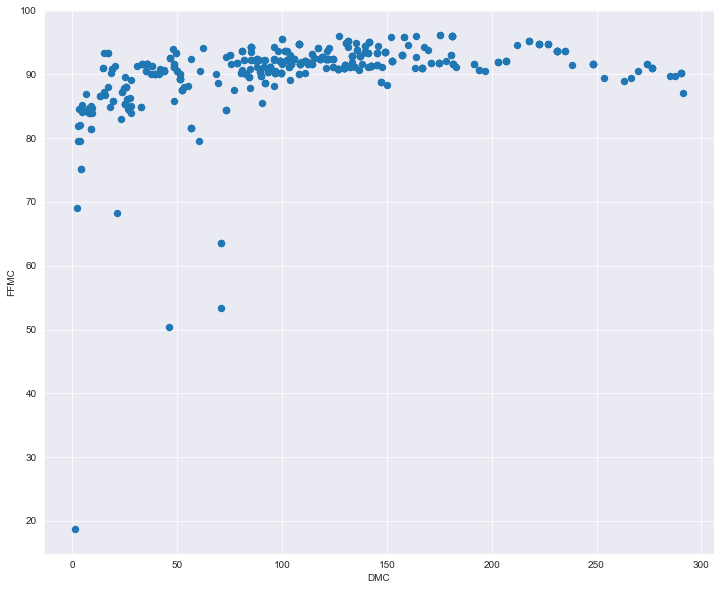

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(data.DMC, data.FFMC, linewidth=1.4)

plt.xlabel('DMC')
plt.ylabel('FFMC')
# на графике видим, что значения лежат примерно в одном диапазоне

In [13]:
# Поищем выбросы, аномальные значения. Буду считать, что значение аномально, если его стандартное отклонение >= 5 по модулю
for i in range(data.shape[0]):
    for j in range(9):
        if (features_std[i][j] >= 5) or (features_std[i][j] <= -5):
            print(i)
            print(j)

22
3
238
8
299
1
312
1
379
1
415
8
499
7


9. На графике можно заметить несколько аномальных значений, отдаленные от основных объектов

In [14]:
data[['DMC', 'FFMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']] = features_std
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,7,4,10,5,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,7,4,10,2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,8,6,7,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,8,6,7,3,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,2,4,1,3,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,7,4,1,3,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,1,4,1,2,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [15]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,4.669246,4.299807,5.758221,2.736944,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16
std,2.313778,1.229900,4.373275,1.925061,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,1.000000,2.000000,0.000000,0.000000,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,3.000000,4.000000,1.000000,1.000000,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,4.000000,4.000000,6.000000,3.000000,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,7.000000,5.000000,11.000000,4.000000,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,9.000000,9.000000,11.000000,6.000000,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


10. RH - столбец с макс. средним значением (3.362881e-16)

In [16]:
target = data.area
train = data.drop(['X', 'Y', 'day', 'area'], axis=1)

11. Столбец с целевым признаком - area

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape
print(N_train, N_test) # 361 156

361 156


12. В тренировочную выборку попадает 361 объект, в тестовую - 156 объект

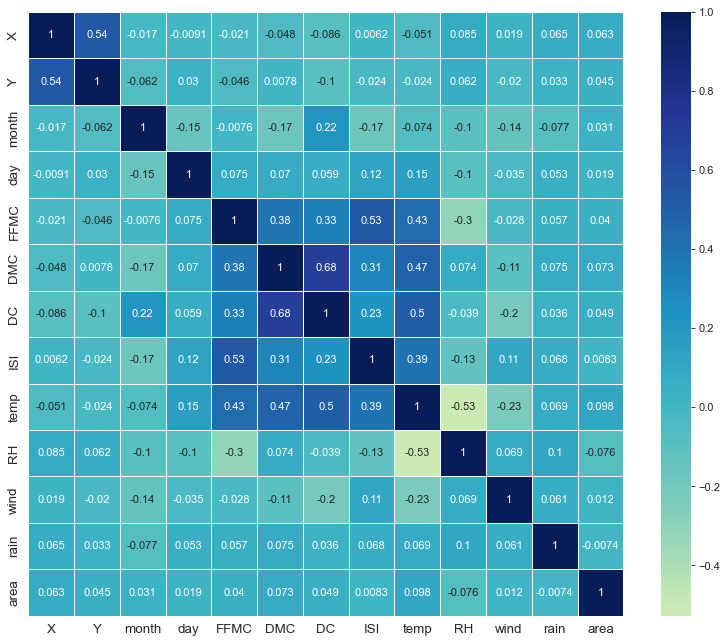

In [18]:
import seaborn as sns

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='YlGnBu', center=0, annot=True,linewidths=.5)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

13. Наблюдается зависимости:
а) Отрицательные между: RH и temp, RH и FFMC
б) Положительные между: Х и У, DC и DMC, FFMC и ISI, DMC и temp, FFMC и temp

In [19]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1,
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,train.columns)))

1 component: 70.06% of initial variance
-0.995 x month + 0.001 x FFMC + 0.033 x DMC + -0.057 x DC + 0.044 x ISI + 0.019 x temp + 0.026 x RH + 0.041 x wind + 0.023 x rain
2 component: 10.57% of initial variance
-0.005 x month + -0.466 x FFMC + -0.445 x DMC + -0.446 x DC + -0.330 x ISI + -0.460 x temp + 0.221 x RH + 0.097 x wind + -0.087 x rain
3 component: 5.34% of initial variance
0.029 x month + -0.086 x FFMC + 0.308 x DMC + 0.227 x DC + 0.017 x ISI + -0.247 x temp + 0.604 x RH + 0.129 x wind + 0.635 x rain
4 component: 4.69% of initial variance
0.025 x month + 0.146 x FFMC + -0.368 x DMC + -0.318 x DC + 0.077 x ISI + 0.161 x temp + -0.403 x RH + 0.148 x wind + 0.725 x rain
5 component: 3.93% of initial variance
-0.045 x month + -0.390 x FFMC + 0.020 x DMC + 0.114 x DC + -0.308 x ISI + 0.236 x temp + -0.081 x RH + -0.788 x wind + 0.236 x rain
6 component: 2.49% of initial variance
0.006 x month + -0.607 x FFMC + 0.216 x DMC + 0.233 x DC + -0.218 x ISI + 0.312 x temp + -0.285 x RH + 0.

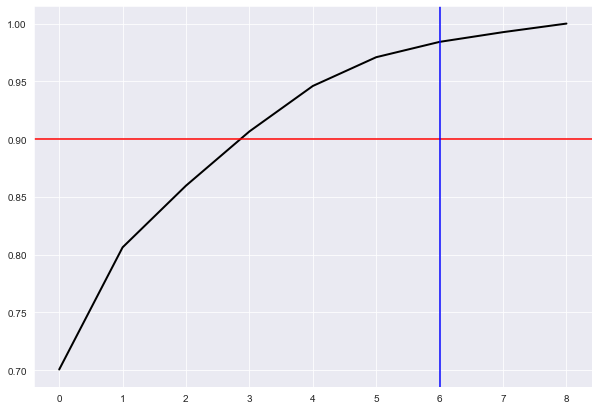

In [20]:
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(6, c='b')

15. Для объяснения 90% дисперсии методом главных компонент достаточно 3 компонент
16. В первую компоненту вносит наибольший вклад признак month (-0.995)

[Text(0.5, 1.0, 'My data tsne')]

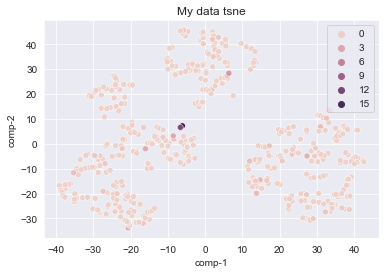

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2, perplexity=10, early_exaggeration=12,
    learning_rate=200, n_iter=500, n_iter_without_progress=20,
    metric='euclidean', init='random',  verbose=0, random_state=42, n_jobs=-1)

z = tsne.fit_transform(data)
df = pd.DataFrame()
df["y"] = target
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="My data tsne")

на графике можно заметить три кластера - это области, между которыми значительное расстояние